In [1]:
import pandas as pd
import numpy as np
import os 
import shutil
import docx
import openpyxl
import matplotlib.pyplot as plt
import time
from datetime import datetime
from datetime import timedelta
import re

In [2]:
'''获取文件路径'''
os.chdir('C:\\Users\\Administrator\\Desktop\\RAD报警事项核查登记簿汇总')
path=os.getcwd()

In [5]:
'''读取excel文件数据'''
rad_data=pd.read_excel('RAD报警事项核查登记簿.xlsm',parse_dates=True,skiprows=1)
rad_data=rad_data.dropna(how='all')
rad_data.loc[:,'报警日期']=pd.to_datetime(rad_data.loc[:,'报警日期'])
rad_data=rad_data.fillna('无内容')
rad_data=rad_data.drop(rad_data.loc[rad_data['报警日期']=='无内容',:].index)
rad_data['申报金额']=rad_data['申报金额'].astype(float)
rad_data.head()

,客户名称,组织机构代码,信用等级,行业大类,行业小类,客户管理部门,企业出资人经济成分小类,所属集团,所属集团编号,业务模块,...,还款来源,项目情况,分行反馈情况,补充核查情况,核查结论,是否需提交处长,解除权限层级,是否需提交副总,是否可在系统解除,Unnamed: 47
0,江苏大亚滤嘴材料有限公司,34655980-5,9,化学纤维制造业,其他合成纤维制造,公司业务部,私人绝对控股,大亚科技集团有限公司及其关联企业,JT010000000200500120,传统单笔,...,无内容,无内容,由于该集团实际控制人陈晓龙与陈建军之间的股权纠纷导致关联企业贷款出现逾期，同时存在或有负债代...,无内容,鉴于本次业务新增已经镇江分行风控委会议纪要和江苏省分行风控委2019年第19期会议纪要同意，...,是,处长权限,否,是,无内容
1,江苏大亚新型包装材料有限公司,34655168-6,10,造纸和纸制品业,其他纸制品制造,公司业务部,私人绝对控股,大亚科技集团有限公司及其关联企业,JT010000000200500120,传统单笔,...,无内容,无内容,由于该集团实际控制人陈晓龙与陈建军之间的股权纠纷导致关联企业贷款出现逾期，同时存在或有负债代...,无内容,鉴于本次业务新增已经镇江分行风控委会议纪要和江苏省分行风控委2019年第19期会议纪要同意，...,是,处长权限,否,是,无内容
2,江苏大亚印务有限公司,34655923-1,9,印刷和记录媒介复制业,包装装潢及其他印刷,公司业务部,私人绝对控股,大亚科技集团有限公司及其关联企业,JT010000000200500120,传统单笔,...,无内容,无内容,由于该集团实际控制人陈晓龙与陈建军之间的股权纠纷导致关联企业贷款出现逾期，同时存在或有负债代...,无内容,鉴于本次业务新增已经镇江分行风控委会议纪要和江苏省分行风控委2019年第19期会议纪要同意，...,是,处长权限,否,是,无内容
3,瑞康医药安徽有限公司,57485887-4,9,电力、热力生产和供应业,风力发电,集团客户部,私人绝对控股,国家电力投资集团有限公司,JT010000000200500202,额度审批,...,产品销售收入， 2017年-2019年，瑞康安徽分别实现营业收入31001.48万元、348...,无内容,该客户经营正常，为地方疫情防控名单客户，本次新增额度仅限用于为应对新型冠状病毒疫情相关产品采...,无内容,客户为地方疫情名单企业，依据法院判决已与关联企业解除关联关系，建议解除。,是,处长权限,否,是,1、隐藏列内容错误，请修改\n2、新客户纯新增，请补充近三年经营数据。
4,宁波中哲物产有限公司,无内容,无内容,无内容,无内容,无内容,无内容,无内容,无内容,额度审批,...,无内容,无内容,风险限额偏低原因：公司2019年报暂未审计，部分利润未在账面体现，净利润相对较低，2019年...,无内容,企业2018年风险限额为2543万元，因2019年报暂未审计，部分利润未在账面体现，故净利润...,是,副总权限,是,是,新增授信，请补充近三年经营数据


In [8]:
'''判断项目是否需要写入word'''
def WrittenAlterM1(df):
    rows=len(df)
    index=[]
    for row in range(rows) :
        filedate=datetime.date(df.loc[row,'填写时间'])  #对填写时期变为年月日形式
        datenow=datetime.date(datetime.now()) -timedelta(2) # 对目前时间变为年月日形式 可通过  timedelta(1) 调整时间
        if filedate==datenow and df.loc[row,'是否需提交处长']=='是' and df.loc[row,'解除权限层级']=='处长权限':
            index.append(row)
    return index

def WrittenAlterM2(df):
    rows=len(df)
    index=[]
    for row in range(rows) :
        filedate=datetime.date(df.loc[row,'填写时间'])  #对填写时期变为年月日形式
        datenow=datetime.date(datetime.now()) -timedelta(2)  #对目前时间变为年月日形式 可通过  timedelta(1) 调整时间
        if filedate==datenow and df.loc[row,'是否需提交处长']=='是' \
        and  df.loc[row,'解除权限层级']=='副总权限'  and  df.loc[row,'是否需提交副总']=='是':
            index.append(row)
    return index

print(WrittenAlterM1(rad_data))
print(WrittenAlterM2(rad_data))  

[20]
[78]


In [9]:
'''生成对应word文本'''
def GenerateDoc(df,targets=[1],name=['报警事项核查模板']): 
    doc=docx.Document('报警事项核查模板.docx')
    
    '''删除文件夹中已经存在的 报警事项核查副总解除权限.docx以及报警事项核查副总解除权限.docx文件'''
    for folders,subfolders,files in os.walk(os.getcwd()):
        for file in files:
            if file.endswith('报警事项核查副总解除权限.docx') or file.endswith('报警事项核查处长解除权限.docx') :
                os.unlink(file)
                
    '''excel文件内容写入word'''      
    for target in targets:
            t1=doc.add_heading('报警事项:'+df.loc[target,'报警原因'].strip(),1) 
            subtitle1=doc.add_paragraph( 
            '{0}年{1}月{2}日'.format(df.loc[target,'报警日期'].strftime('%Y'),
                                                  df.loc[target,'报警日期'].strftime('%m'),
                                                  df.loc[target,'报警日期'].strftime('%d') )
                +'   '
                +df.loc[target,'一级分行'],
                'context1')
            subtitle2=doc.add_paragraph('客户名称：'+df.loc[target,'客户名称'],'context1')
            subtitle3=doc.add_paragraph(df.loc[target,'业务模块'].strip()+'：'+str(int(df.loc[target,'申报金额']/10000))+'万元   核查人： '
                                        +df.loc[target,'报警核查人'].strip(),'context1')
            # 开始针对各个单元格内容进行编辑
            for i in range(len(df.columns)-41): # 开始列为 34列+末尾6列不要
                if df.iloc[target,i+35]!='无内容':
                    context=doc.add_paragraph(df.columns[i+35].strip()+': ','context')
                    contents=re.split('\\\\n|\n',df.iloc[target,i+35].strip()) #df.iloc[target,i+9].strip().split('\\n') 
                    context1=context.add_run( contents[0].strip())
                    context1.bold=False
                      # 开始针对单元格内部内容进行编辑，对有回车进行分割
                    for content in contents[1:]:
                        context2=doc.add_paragraph(content.strip(),'context2')
                        
            subtitle4=doc.add_paragraph('核查结论:'+df.loc[target,'核查结论'].strip(),'context1')
            doc.save('C:\\Users\\Administrator\\Desktop\\{}{}.docx'.format(df.loc[target,'填写时间'].strftime('%Y-%m-%d'),name[0]))
    return  None
    
GenerateDoc(rad_data,WrittenAlterM2(rad_data),['报警事项核查副总解除权限'])


In [7]:
os.getcwd()
os.chdir('C:\\Users\\Administrator\\Desktop')

In [69]:
financial_data=pd.read_excel('主要还款来源为地方财政资金的融资业务审批情况调查表（季报）.xlsx',
                             parse_dates=True,skiprows=12)
financial_columns=pd.Series(financial_data.columns)
financial_data=financial_data.drop(financial_data.columns[24:],axis=1)
financial_data.drop(0,inplace=True)
financial_data['客户编号']=financial_data['客户编号'].astype('a')
print(financial_data.dtypes)
financial_data.head(2)

客户名称                             object
客户编号                               |S21
企业出资人经济成分小类                      object
行业小类                             object
申报机构                             object
申报行级别                            object
申报机构所属一级行                        object
审批机构                             object
审批行级别                            object
审批机构所属一级行                        object
授信品种小类                           object
业务编号                             object
业务性质                             object
申请性质                             object
受理日期                             object
批复日期                             object
申报金额\n（万元）                      float64
批复金额\n（万元）                      float64
审批结论                             object
主要还款来源是否为地方财政资金                  object
是否存量政府背景类整改业务                    object
还款来源涉及的财政名称（如：XX市XX区、XX市XX县）     object
还款来源涉及的财政层级                      object
备注                               object
dtype: object


,客户名称,客户编号,企业出资人经济成分小类,行业小类,申报机构,申报行级别,申报机构所属一级行,审批机构,审批行级别,审批机构所属一级行,...,受理日期,批复日期,申报金额 （万元）,批复金额 （万元）,审批结论,主要还款来源是否为地方财政资金,是否存量政府背景类整改业务,还款来源涉及的财政名称（如：XX市XX区、XX市XX县）,还款来源涉及的财政层级,备注
1,上海多伦建设发展有限公司,b'13890000000101265',国有绝对控股,房地产开发经营,建行上海虹口支行（汇总）本级,二级分行,建行上海市分行,建行上海市分行本级,一级分行,建行上海市分行,...,9/12/2019,9/18/2019,44.0,44.0,同意,否,NaN,NaN,NaN,NaN
2,上海宁贤置业有限公司,b'155890000000388860',国有绝对控股,房地产开发经营,建行上海闵行支行（汇总）本级,二级分行,建行上海市分行,中国建设银行本级,总行,中国建设银行本级,...,6/12/2019,7/16/2019,4.8,4.8,同意,否,NaN,NaN,NaN,NaN


In [70]:
areas=financial_data.loc[:,'申报机构所属一级行'].unique()
area_range=pd.Series(areas)
# for name,group in financial_data.groupby('审批机构所属一级行'):
#     print(name)
#     print(group)

In [71]:
import openpyxl
wb=openpyxl.Workbook()
for i,area in enumerate(areas):
    wb.create_sheet(index=i,title=area)
wb.save('example_copy.xlsx')

In [72]:
writer=pd.ExcelWriter('example_copy.xlsx')
for name,group in financial_data.groupby('申报机构所属一级行'):
    group.to_excel(writer,name)
writer.save()

In [29]:
os.chdir('C:\\Users\\Administrator\\Desktop')
os.getcwd()
alter_data1=pd.read_excel('1.xls')
alter_data2=pd.read_excel('2.xls')
alter_data3=pd.read_excel('3.xls')
alter_data4=pd.read_excel('4.xls')
alter_data=pd.concat([alter_data1,alter_data2,alter_data3,alter_data4])

In [30]:
alter_data.loc[:,'报警日期']=pd.to_datetime(alter_data.loc[:,'报警日期'])
alter_data.loc[:,'确认提交时间']=pd.to_datetime(alter_data.loc[:,'确认提交时间'])
alter_data.loc[:,'核查提交时间']=pd.to_datetime(alter_data.loc[:,'核查提交时间'])
alter_data.loc[:,'审核提交时间']=pd.to_datetime(alter_data.loc[:,'审核提交时间'])

In [67]:
may_alter=alter_data.loc[alter_data['确认提交时间']>datetime(2020,4,30),:]
may_alter_no=may_alter.loc[:,['业务编号','申报金额']].fillna(0)
may_alter_count=may_alter_no['业务编号'].count()
may_alter_no=may_alter_no.drop_duplicates(['业务编号','申报金额'])
may_alter_amount=may_alter_no['申报金额'].sum()/100000000
print('合计申报金额：{} 亿元    合计报警笔数:{}  '.format(round(may_alter_amount,2),may_alter_count))

合计申报金额：649.81 亿元    合计报警笔数:194  


In [10]:
os.getcwd()
folders=os.listdir('C:\\Users\\Administrator\\Desktop\\test')
pattern=re.compile(r'.*txt')
for folder in folders:
    if len(pattern.findall(folder))!=0:
           shutil.move('C:\\Users\\Administrator\\Desktop\\test\\'+str(folder),'C:\\Users\\Administrator\\Desktop\\'+str(folder))

In [23]:
data=pd.read_csv('C:\\Users\\Administrator\\Desktop\\1.csv',sep='\t')
data.loc[:,'客户风险类型'].fillna('未确定风险类型',inplace=True)
data.head(30)

,客户风险类型,组织类别
0,未确定风险类型,私营合伙
1,未确定风险类型,有限责任（公司）
2,未确定风险类型,民办非企业单位
3,未确定风险类型,联营
4,未确定风险类型,外资
5,未确定风险类型,私营独资
6,小企业客户,社会团体
7,小企业客户,私营
8,项目法人类,其他联营
9,项目法人类,国家行政机关


In [6]:
data=pd.read_csv('C:\\Users\\Administrator\\Desktop\\2.csv',sep='\t')
data.loc[:,'报告期']=pd.to_datetime(data.loc[:,'报告期'])
data.head()

,报告期,客户所属部门,客户规模,授信额度
0,2019-12-31,3.0,微小型,2.050000e+08
1,2019-12-31,5.0,特大型,1.000000e+09
2,2019-12-31,11.0,小型,NaN
3,2019-12-31,11.0,中小型,NaN
4,2019-12-31,8.0,特大型,1.000000e+07


In [88]:
data.loc[data['客户所属部门'].isnull(),:]
data=data.dropna(axis='index',how='any',subset=['客户所属部门','客户规模'])
data=data.fillna({'客户规模':'未确定客户规模','授信额度':0})
data.groupby(['客户规模','客户所属部门']).aggregate({'报告期':'count','授信额度':'sum'})
data_plot=data.groupby(['客户规模'])['授信额度'].sum()
data_plot=pd.DataFrame({'客户规模':data_plot.index,'授信额度':data_plot,'序号':range(data_plot.count())})
data_plot=data_plot.reset_index(drop=True)
data_plot=data_plot.sort_values(by=['授信额度'],ascending=[True])

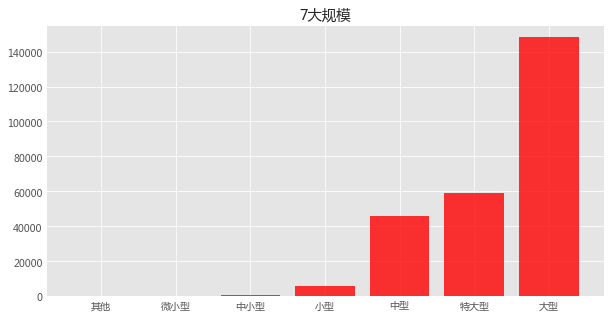

In [215]:
%matplotlib inline
import matplotlib.style as style
plt.style.use('ggplot')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,5))
plt.bar(data_plot['客户规模'],data_plot['授信额度']/100000000,align='center',color='red',alpha=0.8)
plt.title('7大规模')
plt.savefig('C:\\Users\\Administrator\\Desktop\\2.png',dpi=200)                    #('C:\Users\Administrator\Desktop\2.png')

In [363]:
amount_data=pd.read_excel('C:\\Users\\Administrator\\Desktop\\额度.xlsx',parse_dates=True)
amount_data=amount_data.loc[:,['审批方式','净用时','批复编号']]
amount_data.loc[amount_data['净用时']<0,'净用时']=0

In [364]:
amount_data_meeting=amount_data.loc[amount_data['审批方式']=='会议',:]
amount_data_nomeeting=amount_data.loc[amount_data['审批方式']!='会议',:]

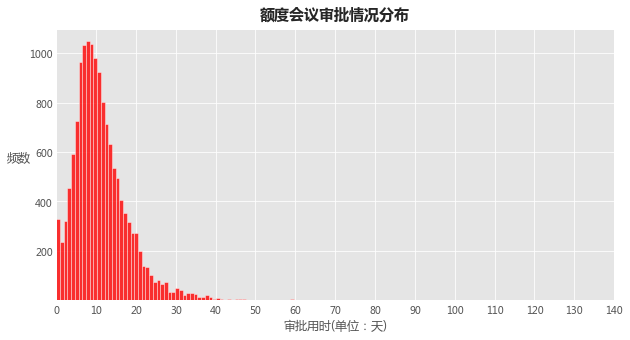

In [365]:
# plt.rcParams['font.sans-serif']=['Microsoft YaHei'] # matplotlib 中文文本乱码调整
# plt.rcParams['axes.unicode_minus']=False # matplotlib 中文文本乱码调整
from matplotlib.pyplot import MultipleLocator
plt.figure(figsize=(10,5))
plt.hist(amount_data_meeting['净用时'],bins=140,histtype='bar',alpha=0.8,color='red',edgecolor='white')
plt.xlim(0,140)
plt.ylim(0.1,1100)
plt.title('额度会议审批情况分布',fontsize=15,fontweight='bold',pad=10)
plt.xlabel('审批用时(单位：天)') #设置x轴对应名称
x_major_locator=MultipleLocator(10)
plt.gca().xaxis.set_major_locator(x_major_locator) #设置x轴标签间隔
plt.xticks(range(0,150,10),['0','10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110', '120', '130', '140']) #修改x轴对应刻度标签
plt.ylabel('频数',rotation=0, labelpad=10) #设置y轴对应名称
# plt.gca().set_yticklabels(['','200', '400', '600', '800', '1000'])
plt.savefig('C:\\Users\\Administrator\\Desktop\\额度会议审批情况分布.png')

In [233]:
# np.histogram(amount_data_meeting['净用时'],bins=140) #显示对应频数分布

In [366]:
amount_data_describe=pd.DataFrame(amount_data_meeting['净用时'].describe())
amount_data_describe=amount_data_describe.reset_index()
df1=pd.DataFrame({'index':{1:'skew',2:'kurt'},
            '净用时':{1:amount_data_meeting['净用时'].skew(),2:amount_data_meeting['净用时'].kurt()} })
amount_data_describe=pd.concat([amount_data_describe,df1],ignore_index=True)
amount_data_describe

,index,净用时
0,count,14741.000000
1,mean,11.274212
2,std,7.347259
3,min,0.000000
4,25%,6.590000
5,50%,9.930900
6,75%,14.428600
7,max,130.577200
8,skew,2.498255
9,kurt,18.251715


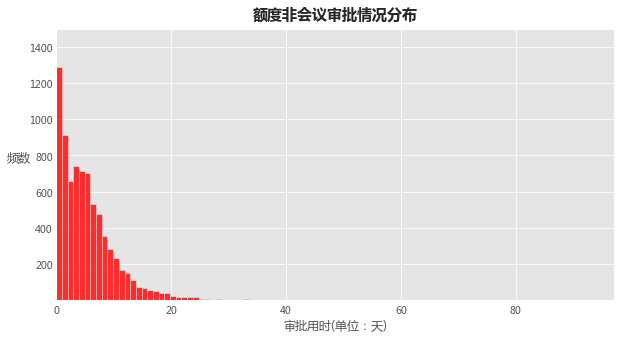

In [367]:
from matplotlib.pyplot import MultipleLocator
plt.figure(figsize=(10,5))
plt.hist(amount_data_nomeeting['净用时'],bins=int(amount_data_nomeeting['净用时'].max())+1,histtype='bar',alpha=0.8,color='red',edgecolor='white')
plt.xlim(0,amount_data_nomeeting['净用时'].max()+1)
plt.ylim(0.1,1500)
plt.title('额度非会议审批情况分布',fontsize=15,fontweight='bold',pad=10)
plt.xlabel('审批用时(单位：天)') #设置x轴对应名称
# x_major_locator=MultipleLocator(10)
# plt.gca().xaxis.set_major_locator(x_major_locator) #设置x轴标签间隔
# plt.xticks(range(0,150,10),['0','10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110', '120', '130', '140']) #修改x轴对应刻度标签
plt.ylabel('频数',rotation=0, labelpad=10) #设置y轴对应名称
# plt.gca().set_yticklabels(['','200', '400', '600', '800', '1000'])
plt.savefig('C:\\Users\\Administrator\\Desktop\\额度非会议审批情况分布.png')

In [368]:
amount_data_describe=pd.DataFrame(amount_data_nomeeting['净用时'].describe())
amount_data_describe=amount_data_describe.reset_index()
df1=pd.DataFrame({'index':{1:'skew',2:'kurt'},
            '净用时':{1:amount_data_nomeeting['净用时'].skew(),2:amount_data_nomeeting['净用时'].kurt()} })
amount_data_describe=pd.concat([amount_data_describe,df1],ignore_index=True)
amount_data_describe

,index,净用时
0,count,7819.000000
1,mean,5.554895
2,std,5.520141
3,min,0.000000
4,25%,1.620050
5,50%,4.396400
6,75%,7.591350
7,max,96.135800
8,skew,3.545412
9,kurt,30.749296


In [369]:
approval_data=pd.read_excel('C:\\Users\\Administrator\\Desktop\\单笔.xlsx',parse_dates=True)


In [370]:
approval_data_1=approval_data.loc[approval_data['额度类别']=='专项额度',:]
approval_data_2=approval_data.loc[approval_data['额度类别'].isin(['经营周转类额度','债券投资额度','债券承销额度']),:]
approval_data_3=approval_data.loc[~approval_data['额度类别'].isin(['经营周转类额度', \
                                                                 '债券投资额度','债券承销额度','专项额度']),:]

In [374]:
def data_description(df,col_name):
    amount_data_describe=pd.DataFrame(df['净用时'].describe())
    amount_data_describe=amount_data_describe.reset_index()
    df1=pd.DataFrame({'index':{1:'skew',2:'kurt'},  '净用时':{1:df['净用时'].skew(),2:df['净用时'].kurt()} })
    amount_data_describe=pd.concat([amount_data_describe,df1],ignore_index=True)
    pic_name=df.loc[df.index[0],col_name]
    writer=pd.ExcelWriter('C:\\Users\\Administrator\\Desktop\\{}.xlsx'.format(pic_name))
    amount_data_describe.to_excel(writer,'Sheet1')
    writer.save()
    return amount_data_describe

data_description(amount_data_nomeeting,'审批方式')
data_description(amount_data_meeting,'审批方式')
data_description(approval_data_1,'额度类别')
data_description(approval_data_2,'额度类别')
data_description(approval_data_3,'额度类别')

,index,净用时
0,count,24086.000000
1,mean,1.075551
2,std,1.965702
3,min,0.000000
4,25%,0.384800
5,50%,0.656000
6,75%,1.105975
7,max,66.808800
8,skew,10.361671
9,kurt,180.706698


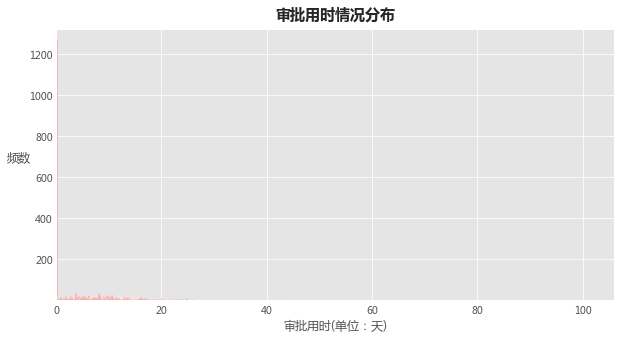

In [397]:
def distribution_plot(df,col_name,multipler=1):
    plt.figure(figsize=(10,5))
    plt.hist(df['净用时'],bins=(int(df['净用时'].max())+1)*multipler,histtype='bar',alpha=0.8,color='red',edgecolor='white')
    count,border=np.histogram(df['净用时'],bins=(int(df['净用时'].max())+1)*multipler) 
    plt.xlim(0,int(df['净用时'].max())+1)
    plt.ylim(0.1,count.max()+50)
    plt.title('审批用时情况分布',fontsize=15,fontweight='bold',pad=10)
    plt.xlabel('审批用时(单位：天)') #设置x轴对应名称
    plt.ylabel('频数',rotation=0, labelpad=10) #设置y轴对应名称
    pic_name=df.loc[df.index[0],col_name]
    plt.savefig('C:\\Users\\Administrator\\Desktop\\{}.png'.format(pic_name),dpi=100)
    df1=pd.DataFrame({'border':border}) #提取原始数据
    df1=df1[1:]
    df2=pd.DataFrame({'count':count})
    df1=df1.reset_index()
    df_data=pd.concat([df1,df2],axis=1)
    df_data= df_data.drop(['index'],axis=1)
    writer=pd.ExcelWriter('C:\\Users\\Administrator\\Desktop\\{}原数据.xlsx'.format(pic_name))
    df_data.to_excel(writer,'Sheet1')
    writer.save()
    
# distribution_plot(amount_data_meeting,'审批方式')
# distribution_plot(amount_data_nomeeting,'审批方式',4)
distribution_plot(approval_data_1,'额度类别',10)
# distribution_plot(approval_data_2,'额度类别',10)
# distribution_plot(approval_data_3,'额度类别',10)
